In [ ]:
import pandas as pd
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from keras import backend as K
import numpy as np
# Abhishek_Sutar
# Clear the TensorFlow graph and session
K.clear_session()

# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

: 

In [2]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
y_train.shape

(60000,)

In [7]:
import matplotlib
import matplotlib.pyplot as plt

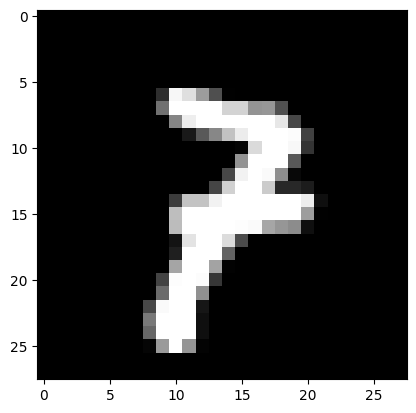

In [10]:
# Get the image data and reshape it
ex_digit = x_train[918].reshape((28, 28))

# Display the image
plt.imshow(ex_digit, cmap='gray')

In [13]:
x_train[918]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [14]:
y_train[918]

7

In [15]:
# Reshape the input data to 2D array
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

In [16]:
# Convert the data to Pandas DataFrames
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
# Convert the DataFrame to a NumPy array
x_train = x_train.values
x_test = x_test.values

In [17]:
# Reshape the input data
x_train = x_train.reshape((60000, 28, 28))
x_test = x_test.reshape((10000, 28, 28))

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 69s 35ms/step - loss: 0.2259 - accuracy: 0.9470
Epoch 2/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0626 - accuracy: 0.9813
Epoch 3/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0483 - accuracy: 0.9850
Epoch 4/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0417 - accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0348 - accuracy: 0.9894


In [20]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0424 - accuracy: 0.9885
Test accuracy: 0.9884999990463257


In [29]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

# Choose an image from the dataset to classify
image_index = 3132
image = x_test[image_index]
actual_label = y_test[image_index]

# Reshape the image to match the input shape of the model
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=-1)

# Normalize the pixel values
image = image.astype('float32')
image /= 255

# Use the model to make predictions on the image
predictions = model.predict(image)

# Get the predicted label
predicted_label = np.argmax(predictions)

# Print the actual and predicted labels
print(f'Actual label: {actual_label}')
print(f'Predicted label: {predicted_label}')


1/1 [==============================] - 0s 48ms/step
Actual label: 1
Predicted label: 1


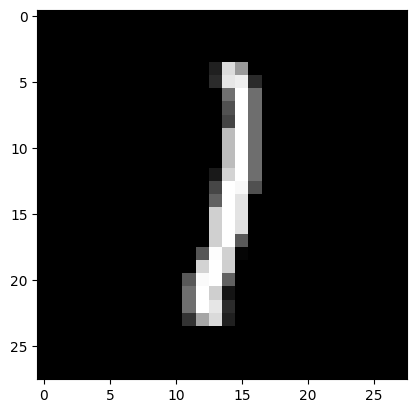

In [32]:
# Get the image data and reshape it
ex_digit = x_train[3132].reshape((28, 28))

# Display the image
plt.imshow(ex_digit, cmap='gray')